# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [33]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [34]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


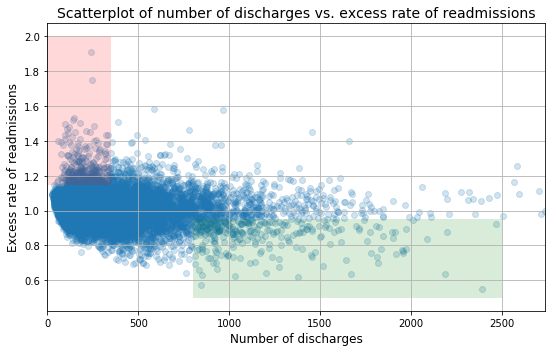

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?

##### [ANS] Do not agree with (1) a significant correlation between hospital capacity (number of discharges) and readmission rates. Because the correlation between discharge and readmission rate is not measured statistically, but solely judged on plots. Sufficient statistic analysis should be calculated, as well as the hypothesis test if a relationship need to be drawn.
##### (2) The statistic described only addressed two side of the population, the hospital with discharges  < 100, and with discharges > 1000, there were a large data range from 101-999 not addressed.
##### (3) Conclusion on that the readmission is resulted from lacking of resources in hospitals , this statement lacks evidence to support it. 

In [81]:
# further clean dataset
print "Nan values in readmission:", clean_hospital_read_df['Excess Readmission Ratio'].isnull().sum()
print "Nan values in Discharges:",clean_hospital_read_df['Number of Discharges'].isnull().sum()
print "Total number of samples:", len(clean_hospital_read_df)

Nan values in readmission: 0
Nan values in Discharges: 0
Total number of samples: 11497


In [46]:
# Drop rows containing NaN (for the size of total dataset, this is less than 1%)
clean_hospital_read_df=clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])

In [48]:
clean_hospital_read_df.isnull().sum()  # check data clean , no NaN in meaningful features

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [49]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [82]:
# The R^2 :
from scipy import stats
r=stats.pearsonr(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Excess Readmission Ratio'])
print "correlation coefficient of two data is:",r[0]

correlation coefficient of two data is: -0.0973979435108


correlation coefficient is not very significnat between Excess readmission and Number of discharge.

####  B.Provide support for your arguments and your own recommendations with a statistically sound analysis:
1.Setup an appropriate hypothesis test.


H0:  There is no significant relationship between number of discharge and the excess readmission.

H1:  There is significant correlation between number of discharge and number of readmission.

Define the test statistic as the Pearson-R (correlation coefficient)

Significant level 95%

##### 2.Compute and report the observed significance value (or p-value).

In [61]:
# first compute the simulation set of discharge and Readmission data that are random , based on H0, there is no significant 
# relationship between discharge and readmission 
# first define function
def permute_stat(data_1, data_2, size):
    """ This function calculates the pearson correlation coefficient for two sets of data, but randomized"""
    """ Returns statistics value of size = size"""
    import numpy as np
    r = np.empty(size)

    np.random.seed(22)
    for i in range(size):
        syn_data1 = np.random.permutation(data_1)
        syn_data2 = np.random.permutation(data_2)
        r[i] = (stats.pearsonr(syn_data1,syn_data2))[0]
    return r
    

In [89]:
# calculate bootstrap correlation coefficient , size 10000
r = permute_stat(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Excess Readmission Ratio'], 10000)

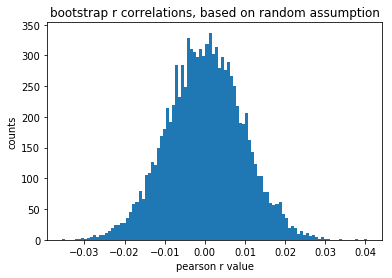

In [90]:
plt.hist(r, bins = 100)
plt.xlabel('pearson r value')
plt.ylabel('counts')
plt.title('bootstrap r correlations, based on random assumption')

In [88]:
## Calculate P-value for a 0.79 pearson r:
P_val_09 = sum(r<=-0.0973)
print "p_value for the hospital dataset is:", P_val_09

p_value for the hospital dataset is: 0


The P value for this observation to occur is 0 assuming there is no relation between discharge and readmission.
That means the H0 should be rejected. There is siginificant correlation between discharge and readmission.

In [105]:
## investigate the top(discharge >1000) and lower capacity (<100)hospitals:
top_h=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>1000]
low_h=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<100]
print " number of high-charge hospital: ", len(top_h)
print " number of low-charge hospital: ", len(low_h)

 number of high-charge hospital:  463
 number of low-charge hospital:  1188


correlation coefficient of two data is: -0.0792766567904


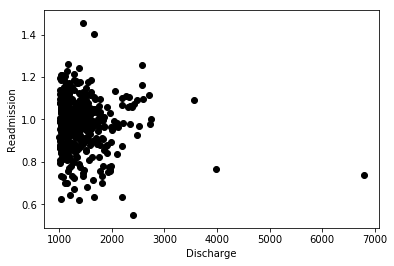

In [94]:
_=plt.scatter(top_h['Number of Discharges'],top_h['Excess Readmission Ratio'], c='k')
_=plt.xlabel('Discharge')
_=plt.ylabel('Readmission')
r=stats.pearsonr(top_h['Number of Discharges'],top_h['Excess Readmission Ratio'])
print "correlation coefficient of two data is:",r[0]

In [99]:
##P value for top discharge:
r = permute_stat(top_h['Number of Discharges'],top_h['Excess Readmission Ratio'], 10000)
P_val_07 = float(sum(r<=-0.0793))/10000
print "p_value for the hospital dataset is:", P_val_07

p_value for the hospital dataset is: 0.047


correlation coefficient of two data is: -0.244635500335


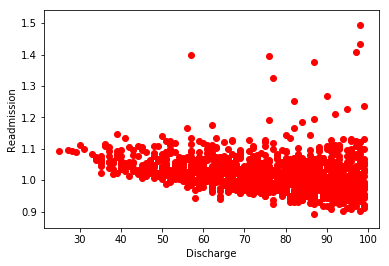

In [95]:
_=plt.scatter(low_h['Number of Discharges'],low_h['Excess Readmission Ratio'], c='r')
_=plt.xlabel('Discharge')
_=plt.ylabel('Readmission')
r=stats.pearsonr(low_h['Number of Discharges'],low_h['Excess Readmission Ratio'])
print "correlation coefficient of two data is:",r[0]

In [104]:
r = permute_stat(low_h['Number of Discharges'],low_h['Excess Readmission Ratio'], 10000)
P_val_02 = float(sum(r<= -0.245))/10000
print "p_value for the hospital dataset is:", P_val_02

p_value for the hospital dataset is: 0.0


[ANS] According to the P_values from bootstraping,  the P_values are less than 0.05 for the significance. Therefore, we can reject H0 , there is significant correlation between Excess readmission ratio and discharge number. This is true either for the case of all hospital, or the individual cases of large (discharge >1000) and small(discharge < 100) hospitals. 

##### 3.Report statistical significance for α = .01. 
All P values suggests the same result since they are < 0.01. H0 should be rejected.

##### 4.Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The idea of statistical significance is the unlikelihood that the statistical value measured/observed would occur due to sampling. Usually, a hypothesis test only provides that there "is"  or "isn't" a relationship aside from sampling. It does not describe the "strength" of the significance, even though it can prove the existence of the relationship. The strength of the relationship may be very minor. For example in this hospital survey, the correlation between discharge and readmission in large and small hospitals, seem to be quite weak looking at the scatter plot, as well as the pearson r value. 
Pair-use the confidence interval would tell us "how strong" the relationship is.

In [127]:
# calculate appropriate sample size ?
# Do a confidence interval based on a bootstrap resampling based on 10000 samples 
# first set up function that draw with replacement from the DataFrame
def randomdraw(datadf, size):
    """ This function randomly draws size x of the sample from a dataframe"""
    fullsize = len(datadf)
    idx = np.arange(fullsize)
    samp = np.random.choice(size, replace=True )
    newdf = datadf.iloc[idx]
    
    return newdf
    

In [128]:
np.random.seed(22)
rrds = np.empty(10000)
for i in range(10000):
    newdf = randomdraw(clean_hospital_read_df, 10000)
    #calculate Pearson R from the random drawings
    rrds[i]=(stats.pearsonr(newdf['Number of Discharges'],newdf['Excess Readmission Ratio']))[0]
    print stats.pearsonr(newdf['Number of Discharges'],newdf['Excess Readmission Ratio'])

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943510793533, 1.222547377680967e-25)
(-0.097397943

In [125]:
rrds[10:23]

array([-0.09739794, -0.09739794, -0.09739794, -0.09739794, -0.09739794,
       -0.09739794, -0.09739794, -0.09739794, -0.09739794, -0.09739794,
       -0.09739794, -0.09739794, -0.09739794])